<a href="https://colab.research.google.com/github/dhirajs16/AI_ML_Colab/blob/main/langgraph_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.3/119.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 19.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13


In [7]:
from google.colab import userdata
GROQ_API_KEY = userdata.get('GROQ_API_KEY')
LANGSMITH_API_KEY = userdata.get('LANGSMITH_API_KEY')


In [9]:
import os
os.environ['LANGCHAIN_API_KEY'] = LANGSMITH_API_KEY
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'langgraph_chatbot'

In [11]:
!pip install langchain-groq
from langchain_groq import ChatGroq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 6.7 MB/s eta 0:00:00


In [16]:
llm = ChatGroq(groq_api_key = GROQ_API_KEY, model = 'llama3-8b-8192')

## **Building Chatbot with LangGraph**



In [17]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [18]:
class State(TypedDict):
  messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [22]:
def chatbot(state:State):
  return {'messages':llm.invoke(state['messages'])}

In [23]:
graph_builder.add_node('chatbot', chatbot)
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)

graph = graph_builder.compile()

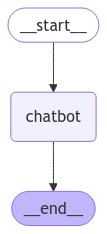

In [24]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [26]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ['quit', 'q']:
    print('Good Bye')
    break

  for event in graph.stream({'messages': ('user', user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print('Assistant', value['messages'].content)

User: q
Good Bye
